In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Title

## Subtitle
Some paragraph

In [2]:
metadata = pd.read_csv('../air_cleaner_data/personal-air-cleaner-experiments - Sheet1.csv', parse_dates=['start_time', 'end_time'])

In [3]:
metadata

,start_time,Distance (in),Experiment,end_time,competing airflow (m/s),Fan,shroud,spacing (in),push filters,pull filters,filepath,Speed dial (%),visor
0,2023-03-26 21:34:45.239273,4,"blower, 1 QT3 HEPA, NCAF",2023-03-10 09:46:33.000000,False,blower,False,2.0,1 QT3 HEPA,NaN,../air_cleaner_data/2023-03-10_09-24-21-SPS3x_...,NaN,NaN
1,2023-03-26 21:39:29.013405,4,"blower, 1 QT3 HEPA, NCAF",2023-03-26 21:39:36.282274,False,blower,False,2.0,1 QT3 HEPA,NaN,../air_cleaner_data/2023-03-10_09-24-21-SPS3x_...,NaN,NaN
2,2023-06-12 13:01:22.083800,2,"2 QT3, NF-F12 iPPC-3000 full speed",2023-06-12 13:02:28.077759,NaN,NF-F12 iPPC-3000 Industrial,False,NaN,2 QT3 HEPA,NaN,../air_cleaner_data/2023-06-12_08:46:02.198914...,NaN,NaN
3,2023-06-12 13:03:29.802904,4,"2 QT3, NF-F12 iPPC-3000 full speed",2023-06-12 13:04:10.674973,NaN,NF-F12 iPPC-3000 Industrial,False,NaN,2 QT3 HEPA,NaN,../air_cleaner_data/2023-06-12_08:46:02.198914...,NaN,NaN
4,2023-06-12 13:04:55.906925,6,"2 QT3, NF-F12 iPPC-3000 full speed",2023-06-12 13:05:33.750074,NaN,NF-F12 iPPC-3000 Industrial,False,NaN,2 QT3 HEPA,NaN,../air_cleaner_data/2023-06-12_08:46:02.198914...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2023-08-29 23:39:31.863839,5,"AirGo QT3, 5 inches",2023-08-29 23:39:58.127889,1,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,../air_cleaner_data/2023-08-29_19:28:03.265445...,50.0,1
216,2023-08-29 23:41:20.002271,5,"AirGo QT3, 5 inches",2023-08-29 23:41:46.666593,1,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,../air_cleaner_data/2023-08-29_19:28:03.265445...,50.0,1
217,2023-08-29 23:42:14.958699,5,"AirGo QT3, 5 inches",2023-08-29 23:42:43.631152,1,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,../air_cleaner_data/2023-08-29_19:28:03.265445...,50.0,1
218,2023-08-29 23:43:19.262477,5,"AirGo QT3, 5 inches",2023-08-29 23:43:40.700539,1,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,../air_cleaner_data/2023-08-29_19:28:03.265445...,50.0,1


In [4]:
csv_metadata = metadata[metadata['Experiment'].str.contains('AirGo QT3')].copy()

In [5]:
for x in ['start_time', 'end_time']:
    csv_metadata.loc[:, x] = csv_metadata[x] - pd.to_timedelta('4 hours')

/var/folders/c3/b8f8shqn6sq34qlk8wt9rcqh0000gn/T/ipykernel_79003/434301341.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  csv_metadata.loc[:, x] = csv_metadata[x] - pd.to_timedelta('4 hours')


In [6]:
csv_metadata

,start_time,Distance (in),Experiment,end_time,competing airflow (m/s),Fan,shroud,spacing (in),push filters,pull filters,filepath,Speed dial (%),visor
168,2023-08-28 14:15:46.023018,4,"AirGo QT3, 5 inches",2023-08-28 14:16:44.672345,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0
169,2023-08-28 14:18:43.734822,4,"AirGo QT3, 5 inches",2023-08-28 14:19:52.748460,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0
170,2023-08-28 14:20:44.822516,4,"AirGo QT3, 5 inches",2023-08-28 14:21:26.205384,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0
171,2023-08-28 14:22:40.128983,4,"AirGo QT3, 5 inches",2023-08-28 14:23:11.842941,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0
172,2023-08-28 14:24:50.530269,4,"AirGo QT3, 5 inches",2023-08-28 14:25:16.949316,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0
173,2023-08-28 14:26:06.699062,4,"AirGo QT3, 5 inches",2023-08-28 14:27:18.322537,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0
174,2023-08-28 14:28:40.786160,4,"AirGo QT3, 5 inches",2023-08-28 14:29:12.393463,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0
175,2023-08-28 14:30:02.531045,4,"AirGo QT3, 5 inches",2023-08-28 14:31:07.228606,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0
176,2023-08-28 14:32:03.187833,4,"AirGo QT3, 5 inches",2023-08-28 14:32:33.494017,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,75.0,0
177,2023-08-28 14:33:06.984213,4,"AirGo QT3, 5 inches",2023-08-28 14:33:34.534013,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,75.0,0


In [7]:
csv_metadata['filepath'].iloc[-1]

'../air_cleaner_data/2023-08-29_19:28:03.265445.csv'

In [8]:
def relative_risk_reduction(df, col='pm1_0_mass_conc'):
    """
    Returns: Percent Reduction
    """
    col_data = df[col].astype('float')
    return (col_data.iloc[0:5].mean() - col_data.iloc[-5:].mean()) / col_data.iloc[0:5].mean() * 100

## compute_relative_risk_reduction_per_row

In [9]:
def compute_relative_risk_reduction_per_row(row):
    #import pdb; pdb.set_trace()
    #row = csv_metadata.iloc[0]
    df = pd.read_csv(row['filepath'], parse_dates=['datetime'], index_col='datetime')
    row_data = df[(df.index > row['start_time']) & (df.index < row['end_time'])]
    return relative_risk_reduction(row_data)

In [10]:
list(csv_metadata['filepath'])

['/Users/eugaddan/Developer/breathesafe/python/air_cleaner_data/2023-08-28 14:07:20.250857.csv',
 '/Users/eugaddan/Developer/breathesafe/python/air_cleaner_data/2023-08-28 14:07:20.250857.csv',
 '/Users/eugaddan/Developer/breathesafe/python/air_cleaner_data/2023-08-28 14:07:20.250857.csv',
 '/Users/eugaddan/Developer/breathesafe/python/air_cleaner_data/2023-08-28 14:07:20.250857.csv',
 '/Users/eugaddan/Developer/breathesafe/python/air_cleaner_data/2023-08-28 14:07:20.250857.csv',
 '/Users/eugaddan/Developer/breathesafe/python/air_cleaner_data/2023-08-28 14:07:20.250857.csv',
 '/Users/eugaddan/Developer/breathesafe/python/air_cleaner_data/2023-08-28 14:07:20.250857.csv',
 '/Users/eugaddan/Developer/breathesafe/python/air_cleaner_data/2023-08-28 14:07:20.250857.csv',
 '/Users/eugaddan/Developer/breathesafe/python/air_cleaner_data/2023-08-28 14:07:20.250857.csv',
 '/Users/eugaddan/Developer/breathesafe/python/air_cleaner_data/2023-08-28 14:07:20.250857.csv',
 '/Users/eugaddan/Developer/br

### debug

In [11]:
csv_metadata.apply(compute_relative_risk_reduction_per_row, axis=1)

168    87.975643
169    90.263697
170    90.164691
171    84.517452
172    93.863134
173    88.311328
174    87.900576
175    93.590917
176    95.364506
177    90.904276
178    93.555366
179    92.755949
180    93.309152
181    89.114716
182    91.412261
183    94.212501
184    91.493350
185    91.837810
186    96.788196
187    95.087029
188    97.010813
189    94.120792
190    95.698326
191    92.864951
192    96.823099
193    93.245667
194    96.231776
195    97.338979
196    95.663545
197     4.289711
198     5.961328
199     1.054190
200     2.267485
201     3.086499
202     0.958066
203     0.948299
204     1.745351
205    -2.139980
206     0.492221
207    92.199059
208    95.993170
209    89.953740
210    93.258373
211    96.661447
212    89.620928
213    94.360059
214    93.997278
215    94.249035
216    92.340350
217    92.643830
218    92.091943
219    93.015874
dtype: float64

In [12]:
csv_metadata['relative_reduction_pm1_0_mass_conc'] = csv_metadata.apply(compute_relative_risk_reduction_per_row, axis=1)

In [13]:
def compute_fit_factor(pm_data):
    return 1 / ((100 - pm_data) / 100)

In [14]:
csv_metadata['fit_factor'] = csv_metadata['relative_reduction_pm1_0_mass_conc'].apply(compute_fit_factor)

In [15]:
csv_metadata['1/ff'] = 1 / csv_metadata['fit_factor']

In [16]:
csv_metadata['speed'] = csv_metadata['Speed dial (%)'].astype('object')

In [17]:
csv_metadata

,start_time,Distance (in),Experiment,end_time,competing airflow (m/s),Fan,shroud,spacing (in),push filters,pull filters,filepath,Speed dial (%),visor,relative_reduction_pm1_0_mass_conc,fit_factor,1/ff,speed
168,2023-08-28 14:15:46.023018,4,"AirGo QT3, 5 inches",2023-08-28 14:16:44.672345,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0,87.975643,8.316453,0.120244,100.0
169,2023-08-28 14:18:43.734822,4,"AirGo QT3, 5 inches",2023-08-28 14:19:52.748460,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0,90.263697,10.270838,0.097363,100.0
170,2023-08-28 14:20:44.822516,4,"AirGo QT3, 5 inches",2023-08-28 14:21:26.205384,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0,90.164691,10.167449,0.098353,100.0
171,2023-08-28 14:22:40.128983,4,"AirGo QT3, 5 inches",2023-08-28 14:23:11.842941,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0,84.517452,6.458885,0.154825,100.0
172,2023-08-28 14:24:50.530269,4,"AirGo QT3, 5 inches",2023-08-28 14:25:16.949316,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0,93.863134,16.294962,0.061369,100.0
173,2023-08-28 14:26:06.699062,4,"AirGo QT3, 5 inches",2023-08-28 14:27:18.322537,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0,88.311328,8.555292,0.116887,100.0
174,2023-08-28 14:28:40.786160,4,"AirGo QT3, 5 inches",2023-08-28 14:29:12.393463,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0,87.900576,8.264856,0.120994,100.0
175,2023-08-28 14:30:02.531045,4,"AirGo QT3, 5 inches",2023-08-28 14:31:07.228606,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,100.0,0,93.590917,15.602855,0.064091,100.0
176,2023-08-28 14:32:03.187833,4,"AirGo QT3, 5 inches",2023-08-28 14:32:33.494017,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,75.0,0,95.364506,21.572674,0.046355,75.0
177,2023-08-28 14:33:06.984213,4,"AirGo QT3, 5 inches",2023-08-28 14:33:34.534013,0,GDSTIME 120mm Blower,False,NaN,Starkvind EPA 12 (cut to fit),NaN,/Users/eugaddan/Developer/breathesafe/python/a...,75.0,0,90.904276,10.994177,0.090957,75.0


In [49]:
agg = csv_metadata.groupby(['Experiment', 'speed', 'competing airflow (m/s)', 'visor']).sum()[['1/ff']]

/var/folders/c3/b8f8shqn6sq34qlk8wt9rcqh0000gn/T/ipykernel_79003/2691468997.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = csv_metadata.groupby(['Experiment', 'speed', 'competing airflow (m/s)', 'visor']).sum()[['1/ff']]


In [50]:
agg

1/ff
Experiment          speed competing airflow (m/s) visor          
AirGo QT3, 5 inches 50.0  0                       0      0.491268
                          1                       0      9.813368
                                                  1      0.896149
                    75.0  0                       0      0.760401
                    100.0 0                       0      0.834126

In [52]:
agg_merge = agg.rename(columns={'1/ff': 'sum 1/ff'}).merge(
    csv_metadata.groupby(['Experiment', 'speed', 'competing airflow (m/s)', 'visor']).count()[['1/ff']].rename(columns={'1/ff': 'count'}),
    left_index=True,
    right_index=True
)

In [53]:
agg_merge

sum 1/ff  count
Experiment          speed competing airflow (m/s) visor                 
AirGo QT3, 5 inches 50.0  0                       0      0.491268     11
                          1                       0      9.813368     10
                                                  1      0.896149     13
                    75.0  0                       0      0.760401     10
                    100.0 0                       0      0.834126      8

In [54]:
agg_merge['overall fit factor'] = agg_merge['count'] / agg_merge['sum 1/ff']
agg_merge

sum 1/ff  count  \
Experiment          speed competing airflow (m/s) visor                    
AirGo QT3, 5 inches 50.0  0                       0      0.491268     11   
                          1                       0      9.813368     10   
                                                  1      0.896149     13   
                    75.0  0                       0      0.760401     10   
                    100.0 0                       0      0.834126      8   

                                                         overall fit factor  
Experiment          speed competing airflow (m/s) visor                      
AirGo QT3, 5 inches 50.0  0                       0               22.391025  
                          1                       0                1.019018  
                                                  1               14.506514  
                    75.0  0                       0               13.150954  
                    100.0 0                       0                9.590882

In [23]:
import seaborn as sns

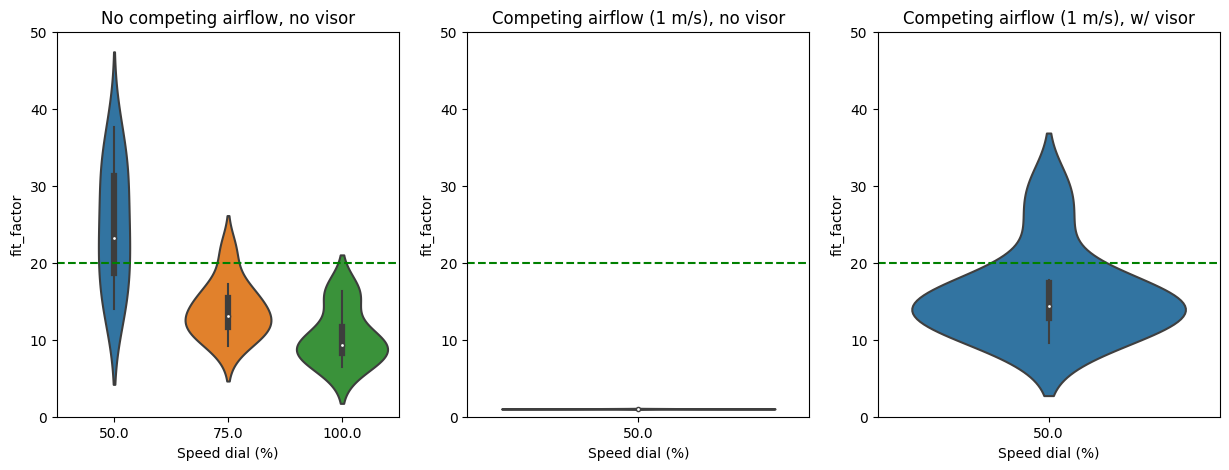

In [42]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.violinplot(data=csv_metadata[
    (csv_metadata['competing airflow (m/s)'] == '0') & \
    (csv_metadata['visor'] == '0')
], x='Speed dial (%)', y='fit_factor', ax=ax[0])
ax[0].set_title("No competing airflow, no visor")

sns.violinplot(data=csv_metadata[
    (csv_metadata['competing airflow (m/s)'] == '1') & \
    (csv_metadata['visor'] == '0')
], x='Speed dial (%)', y='fit_factor', ax=ax[1])

ax[1].set_title("Competing airflow (1 m/s), no visor")

sns.violinplot(data=csv_metadata[
    (csv_metadata['competing airflow (m/s)'] == '1') & \
    (csv_metadata['visor'] == '1')
], x='Speed dial (%)', y='fit_factor', ax=ax[2])

ax[2].set_title("Competing airflow (1 m/s), w/ visor")

for axis in ax:
    axis.set_ylim((0,50))
    axis.axhline(20, linestyle='--', color='g')

    #axis.set_xlim((40,110))
    #axis.legend(["",'N95 lower bound (95% reduction)'])

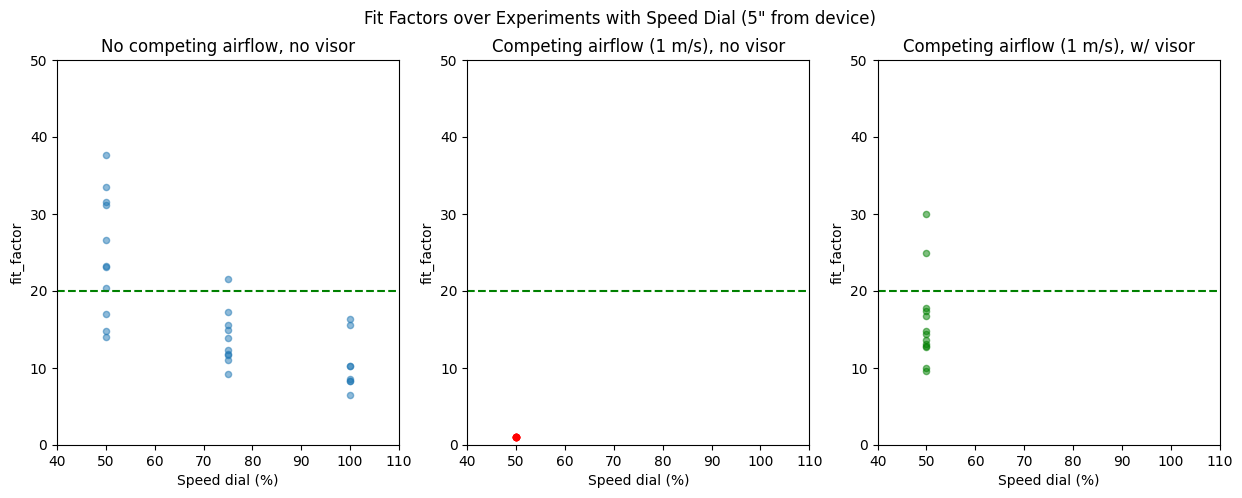

In [38]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Fit Factors over Experiments with Speed Dial (5" from device)')
alpha=0.5

ax[0].set_title("No competing airflow, no visor")
csv_metadata[
    (csv_metadata['competing airflow (m/s)'] == '0') & \
    (csv_metadata['visor'] == '0')
][['Speed dial (%)', 'fit_factor']].plot.scatter(x='Speed dial (%)', y='fit_factor', ax=ax[0], alpha=alpha)

ax[1].set_title("Competing airflow (1 m/s), no visor")
csv_metadata[
    (csv_metadata['competing airflow (m/s)'] == '1') &
    (csv_metadata['visor'] == '0')
][['Speed dial (%)', 'fit_factor']].plot.scatter(x='Speed dial (%)', y='fit_factor', ax=ax[1], color='r', alpha=alpha)

ax[2].set_title("Competing airflow (1 m/s), w/ visor")
csv_metadata[
    (csv_metadata['competing airflow (m/s)'] == '1') &
    (csv_metadata['visor'] == '1')
][['Speed dial (%)', 'fit_factor']].plot.scatter(x='Speed dial (%)', y='fit_factor', ax=ax[2], color='g', alpha=alpha)

for axis in ax:
    axis.set_ylim((0,50))
    axis.axhline(20, linestyle='--', color='g')
    axis.set_xlim((40,110))
#ax.legend(['no competing airflow (0 m/s), no visor', 'competing airflow (1 m/s), no visor', 'competing airflow (1 m/s), w/ visor', 'N95 lower bound (95% reduction)', '2 CR Boxes on Max + Universal Cloth (90% reduction)'])

In [ ]:
plottable.rename({"SmartAir QT3, round 2": "SmartAir QT3"})